<a href="https://colab.research.google.com/github/GagandeepKaur-1/State-Farm-Distracted-Driver-Multiclass-Classification/blob/main/State_Farm_Distracted_Driver_Multiaction_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 !wget https://www.dropbox.com/s/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip?dl=0
 

--2021-04-03 16:00:37--  https://www.dropbox.com/s/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip [following]
--2021-04-03 16:00:37--  https://www.dropbox.com/s/raw/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca2c2ca32ae94ceedfee310f708.dl.dropboxusercontent.com/cd/0/inline/BL6uaWueXIWHF4MGtCfw6T3PDg81WQ9eokyT_xqz9Ln8nh00GpEcMBKZNMEp4LZsUF-DyQFS2SkGTOIR02my6ijNVkorZMvfVbrwzyLqZiFQJusihht4k6KakFLocikbkVvDYXPtXWZHSXgQuTEFLHDb/file# [following]
--2021-04-03 16:00:38--  https://uca2c2ca32ae94ceedfee310f708.dl.dropboxusercontent.com/cd/0/in

In [ ]:
%tensorflow_version 2.x

In [ ]:
!unzip /content/state-farm-distracted-driver-detection.zip?dl=0


Archive:  /content/state-farm-distracted-driver-detection.zip?dl=0
  inflating: sample_submission.csv   
  inflating: driver_imgs_list.csv    
  inflating: imgs.zip                


In [ ]:

!unzip '/content/imgs.zip'

Streaming output truncated to the last 5000 lines.
  inflating: train/c7/img_56661.jpg  
  inflating: train/c7/img_56699.jpg  
  inflating: train/c7/img_56717.jpg  
  inflating: train/c7/img_56724.jpg  
  inflating: train/c7/img_56768.jpg  
  inflating: train/c7/img_56779.jpg  
  inflating: train/c7/img_56849.jpg  
  inflating: train/c7/img_56899.jpg  
  inflating: train/c7/img_56938.jpg  
  inflating: train/c7/img_5706.jpg   
  inflating: train/c7/img_57076.jpg  
  inflating: train/c7/img_57122.jpg  
  inflating: train/c7/img_57137.jpg  
  inflating: train/c7/img_5715.jpg   
  inflating: train/c7/img_57278.jpg  
  inflating: train/c7/img_57321.jpg  
  inflating: train/c7/img_57345.jpg  
  inflating: train/c7/img_57355.jpg  
  inflating: train/c7/img_5741.jpg   
  inflating: train/c7/img_57433.jpg  
  inflating: train/c7/img_5753.jpg   
  inflating: train/c7/img_57559.jpg  
  inflating: train/c7/img_57594.jpg  
  inflating: train/c7/img_5771.jpg   
  inflating: train/c7/img_57712.jpg  

In [ ]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout

In [ ]:
len(os.listdir('test'))

79726

In [ ]:
import os

In [ ]:
print(len(os.listdir('/content/train/c0')))
print(len(os.listdir('/content/train/c1')))
print(len(os.listdir('/content/train/c2')))
print(len(os.listdir('/content/train/c3')))
print(len(os.listdir('/content/train/c4')))
print(len(os.listdir('/content/train/c5')))
print(len(os.listdir('/content/train/c6')))
print(len(os.listdir('/content/train/c7')))
print(len(os.listdir('/content/train/c8')))
print(len(os.listdir('/content/train/c9')))

2489
2267
2317
2346
2326
2312
2325
2002
1911
2129


In [ ]:
model=Sequential()
model.add(Conv2D(32,(5,5),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10,activation="relu"))

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,validation_split=0.20)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
#Test directory
%mkdir Test

In [ ]:
train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical',
        subset='training'
        )

Found 17943 images belonging to 10 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(
        '/content/train',
         target_size=(64, 64),
         batch_size=32,
        class_mode='categorical',
         subset='validation'
        )


Found 4481 images belonging to 10 classes.


In [ ]:

#moving the test images to Test directory
!mv /content/test/  /content/Test

In [ ]:
test_generator = test_datagen.flow_from_directory(
    '/content/Test',
        target_size=(64, 64),
        batch_size=2,
        shuffle=False,
        class_mode='categorical')

Found 79726 images belonging to 1 classes.


In [ ]:
type(test_generator)

tensorflow.python.keras.preprocessing.image.DirectoryIterator

In [ ]:
STEPS_PER_EPOCH = train_generator.n//train_generator.batch_size
VALIDATION_STEPS=validation_generator.n//train_generator.batch_size

In [ ]:

model.fit(
        train_generator,
        steps_per_epoch=STEPS_PER_EPOCH,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=VALIDATION_STEPS)

Epoch 1/10
560/560 [==============================] - 343s 610ms/step - loss: 2.7004 - accuracy: 0.1109 - val_loss: 1.9253 - val_accuracy: 0.3286
Epoch 2/10
560/560 [==============================] - 338s 603ms/step - loss: nan - accuracy: 0.3316 - val_loss: nan - val_accuracy: 0.1109
Epoch 3/10
560/560 [==============================] - 351s 627ms/step - loss: nan - accuracy: 0.1119 - val_loss: nan - val_accuracy: 0.1109
Epoch 4/10
560/560 [==============================] - 339s 606ms/step - loss: nan - accuracy: 0.1139 - val_loss: nan - val_accuracy: 0.1109
Epoch 5/10
560/560 [==============================] - 342s 611ms/step - loss: nan - accuracy: 0.1102 - val_loss: nan - val_accuracy: 0.1107
Epoch 6/10
560/560 [==============================] - 345s 616ms/step - loss: nan - accuracy: 0.1117 - val_loss: nan - val_accuracy: 0.1109
Epoch 7/10
560/560 [==============================] - 344s 613ms/step - loss: nan - accuracy: 0.1131 - val_loss: nan - val_accuracy: 0.1109
Epoch 8/10
560

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Activation, BatchNormalization

In [ ]:
mod = Sequential()
mod.add(Conv2D(32,kernel_size=(5,5),activation='relu',input_shape=(64,64,3)))
mod.add(BatchNormalization())
mod.add(MaxPooling2D(pool_size=(2,2),padding='same'))
mod.add(Dropout(0.3))
mod.add(Conv2D(64,kernel_size=(5,5),activation='relu',padding='same'))
mod.add(BatchNormalization())
mod.add(MaxPooling2D(pool_size=(2,2),padding='same'))
mod.add(Dropout(0.3))
mod.add(Conv2D(128,kernel_size=(5,5),activation='relu',padding='same'))
mod.add(BatchNormalization())
mod.add(MaxPooling2D(pool_size=(2,2),padding='same'))
mod.add(Dropout(0.5))
mod.add(Flatten())
mod.add(Dense(units = 512,activation='relu'))
mod.add(BatchNormalization())
mod.add(Dropout(0.5))
mod.add(Dense(units = 128,activation='relu'))
mod.add(Dropout(0.25))
mod.add(Dense(10,activation='softmax'))

In [ ]:
mod.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
STEPS_PER_EPOCH = train_generator.n//train_generator.batch_size
VALIDATION_STEPS=validation_generator.n//train_generator.batch_size

In [ ]:
model2=mod.fit(
        train_generator,
        steps_per_epoch=STEPS_PER_EPOCH,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=VALIDATION_STEPS)

Epoch 1/5
560/560 [==============================] - 122s 216ms/step - loss: 2.4569 - accuracy: 0.2371 - val_loss: 1.0884 - val_accuracy: 0.6078
Epoch 2/5
560/560 [==============================] - 123s 221ms/step - loss: 1.2462 - accuracy: 0.5496 - val_loss: 0.6301 - val_accuracy: 0.7929
Epoch 3/5
560/560 [==============================] - 121s 217ms/step - loss: 0.8467 - accuracy: 0.7019 - val_loss: 0.5806 - val_accuracy: 0.8118
Epoch 4/5
560/560 [==============================] - 121s 216ms/step - loss: 0.6417 - accuracy: 0.7834 - val_loss: 0.2947 - val_accuracy: 0.9040
Epoch 5/5
560/560 [==============================] - 121s 217ms/step - loss: 0.5391 - accuracy: 0.8213 - val_loss: 0.2291 - val_accuracy: 0.9288


In [ ]:
%matplotlib inline  
import matplotlib.pyplot as plt

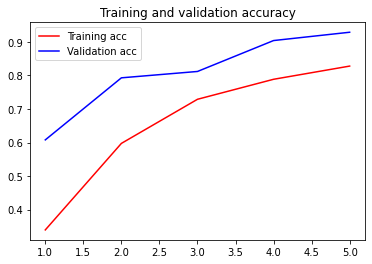

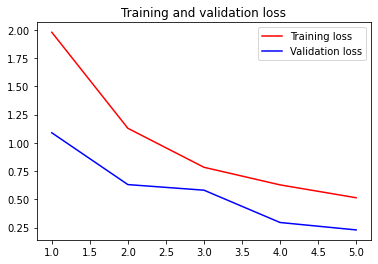

In [ ]:
acc = model2.history['accuracy']
val_acc = model2.history['val_accuracy']
loss = model2.history['loss']
val_loss = model2.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
#plotting train and validation losses
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()